# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [3]:
import requests
import pandas as pd

## Список объектов

In [66]:
offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()

In [67]:
type(objects_data)

dict

In [5]:
objects_data_ex = res.content
dfdf = pd.read_json(objects_data_ex)
dfdf.head()

,data,errcode
list,"[{'objId': 13397, 'developer': {'devId': 306, ...",0
total,10083,0


In [6]:
# res.json()
objects_data

{'data': {'list': [{'objId': 13397,
    'developer': {'devId': 306,
     'shortName': '2МЕН ГРУПП',
     'fullName': '2МЕН ГРУПП',
     'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
     'orgForm': {'id': 1,
      'fullForm': 'Акционерное общество',
      'shortForm': 'АО'},
     'companyGroup': 699421001,
     'devInn': '7701651356'},
    'rpdRegionCd': 72,
    'objAddr': 'г Тюмень, ул Профсоюзная, д. 56',
    'objFloorMin': 6,
    'objFloorMax': 12,
    'objElemLivingCnt': 65,
    'objReady100PercDt': '2024-12-31',
    'objSquareLiving': 6248.51,
    'objCompensFundFlg': 0,
    'objProblemFlg': 0,
    'latitude': 57.1519,
    'longitude': 65.5544,
    'problemFlag': 'NONE',
    'siteStatus': 'Строящиеся',
    'objGuarantyEscrowFlg': 0,
    'residentialBuildings': 1,
    'rpdNum': '72-000097',
    'pdId': 28141,
    'buildType': 'Жилое',
    'objStatus': 0},
   {'objId': 13399,
    'developer': {'devId': 306,
     'shortName': '2МЕН ГРУПП',
     'fullName': '2МЕН ГРУПП',
     'groupName': '2

In [7]:
objects_data.keys()

dict_keys(['data', 'errcode'])

In [8]:
objects_data.get('data').keys()

dict_keys(['list', 'total'])

In [51]:
 objects_data.get('data').get('list')

[{'objId': 13397,
  'developer': {'devId': 306,
   'shortName': '2МЕН ГРУПП',
   'fullName': '2МЕН ГРУПП',
   'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
   'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
   'companyGroup': 699421001,
   'devInn': '7701651356'},
  'rpdRegionCd': 72,
  'objAddr': 'г Тюмень, ул Профсоюзная, д. 56',
  'objFloorMin': 6,
  'objFloorMax': 12,
  'objElemLivingCnt': 65,
  'objReady100PercDt': '2024-12-31',
  'objSquareLiving': 6248.51,
  'objCompensFundFlg': 0,
  'objProblemFlg': 0,
  'latitude': 57.1519,
  'longitude': 65.5544,
  'problemFlag': 'NONE',
  'siteStatus': 'Строящиеся',
  'objGuarantyEscrowFlg': 0,
  'residentialBuildings': 1,
  'rpdNum': '72-000097',
  'pdId': 28141,
  'buildType': 'Жилое',
  'objStatus': 0},
 {'objId': 13399,
  'developer': {'devId': 306,
   'shortName': '2МЕН ГРУПП',
   'fullName': '2МЕН ГРУПП',
   'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
   'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortFo

In [68]:
objects_list = objects_data.get('data').get('list')

In [11]:
objids = [x.get('objId') for x in objects_list]
len(objids)

1000

In [12]:
objids[:10] 

[13397, 13399, 13398, 13391, 23682, 36321, 36912, 44076, 23494, 27476]

In [69]:
df = pd.json_normalize(objects_list)
df.tail()

,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,objProblemFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
995,11023,50,д Покровское,2,3,7,2022-12-31,1526.20,1,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №69",NaN,NaN,NaN,NaN,NaN
996,11026,50,д Покровское,3,3,3,2022-12-31,713.40,1,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №71",NaN,NaN,NaN,NaN,NaN
997,32606,50,д Покровское,3,3,12,2022-12-31,672.84,0,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №57",NaN,NaN,NaN,NaN,NaN
998,32605,50,д Покровское,3,3,12,2022-12-31,672.84,0,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №56",NaN,NaN,NaN,NaN,NaN
999,11021,50,д Покровское,2,2,6,2022-12-31,1011.70,1,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №65",NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,objId,rpdRegionCd,objFloorMin,objFloorMax,objElemLivingCnt,objSquareLiving,objCompensFundFlg,objProblemFlg,latitude,longitude,objGuarantyEscrowFlg,residentialBuildings,pdId,objStatus,developer.devId,developer.orgForm.id,developer.companyGroup,developer.bankruptStage.bankruptStageCd
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.0,999.000000,999.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.00000,7.580000e+02,34.000000
mean,29856.114000,52.79200,9.518000,10.70700,143.03100,7346.443780,0.273000,0.0,54.770992,48.184475,0.503000,0.872000,196623.36100,0.0,3715.617000,7.87900,3.860563e+09,4.911765
std,11196.116762,23.21861,7.649588,8.26895,187.67874,9768.701377,0.445724,0.0,5.056132,22.913209,0.500241,0.334257,187112.43788,0.0,3445.002514,20.29434,2.776659e+09,1.055079
min,851.000000,1.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,42.053200,19.903300,0.000000,0.000000,172.00000,0.0,32.000000,1.00000,3.020000e+02,4.000000
25%,22612.750000,35.00000,3.000000,3.00000,20.75000,1026.640000,0.000000,0.0,54.723150,36.930500,0.000000,1.000000,56028.00000,0.0,1171.000000,4.00000,9.547845e+08,4.000000
50%,32827.500000,54.00000,7.000000,9.00000,78.00000,3777.500000,0.000000,0.0,55.506300,39.046000,1.000000,1.000000,88238.00000,0.0,2946.000000,4.00000,3.955566e+09,4.000000
75%,38323.250000,77.00000,14.000000,16.00000,201.00000,10317.420000,1.000000,0.0,59.178800,50.195400,1.000000,1.000000,388152.75000,0.0,6193.000000,4.00000,5.874016e+09,6.000000
max,46017.000000,91.00000,55.000000,55.00000,1529.00000,107306.400000,1.000000,0.0,63.928600,142.743100,1.000000,1.000000,585318.00000,0.0,13654.000000,121.00000,9.856778e+09,7.000000


In [15]:
#выводим список названий фичей
l = list(df.columns)
l

['objId',
 'rpdRegionCd',
 'objAddr',
 'objFloorMin',
 'objFloorMax',
 'objElemLivingCnt',
 'objReady100PercDt',
 'objSquareLiving',
 'objCompensFundFlg',
 'objProblemFlg',
 'latitude',
 'longitude',
 'problemFlag',
 'siteStatus',
 'objGuarantyEscrowFlg',
 'residentialBuildings',
 'rpdNum',
 'pdId',
 'buildType',
 'objStatus',
 'developer.devId',
 'developer.shortName',
 'developer.fullName',
 'developer.groupName',
 'developer.orgForm.id',
 'developer.orgForm.fullForm',
 'developer.orgForm.shortForm',
 'developer.companyGroup',
 'developer.devInn',
 'objCommercNm',
 'complexShortName',
 'developer.bankruptStage.bankruptStageCd',
 'developer.bankruptStage.bankruptStageDesc',
 'developer.bankruptStage.bankruptLawUrl',
 'developer.orgBankruptMsgDttm']

In [16]:
#меняем названия колонок: удаляем obj из названия первых колонок за ненадобностью
for i in range(2,10):
    l[i]= l[i][3:]
l

['objId',
 'rpdRegionCd',
 'Addr',
 'FloorMin',
 'FloorMax',
 'ElemLivingCnt',
 'Ready100PercDt',
 'SquareLiving',
 'CompensFundFlg',
 'ProblemFlg',
 'latitude',
 'longitude',
 'problemFlag',
 'siteStatus',
 'objGuarantyEscrowFlg',
 'residentialBuildings',
 'rpdNum',
 'pdId',
 'buildType',
 'objStatus',
 'developer.devId',
 'developer.shortName',
 'developer.fullName',
 'developer.groupName',
 'developer.orgForm.id',
 'developer.orgForm.fullForm',
 'developer.orgForm.shortForm',
 'developer.companyGroup',
 'developer.devInn',
 'objCommercNm',
 'complexShortName',
 'developer.bankruptStage.bankruptStageCd',
 'developer.bankruptStage.bankruptStageDesc',
 'developer.bankruptStage.bankruptLawUrl',
 'developer.orgBankruptMsgDttm']

In [70]:
#присваиваем новые названия колонкам
df.columns=l
df.head()

,objId,rpdRegionCd,Addr,FloorMin,FloorMax,ElemLivingCnt,Ready100PercDt,SquareLiving,CompensFundFlg,ProblemFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6248.51,0,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,13391,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-06-30,4293.67,1,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,23682,47,д Агалатово,10,10,54,2022-06-30,2748.15,1,0,...,Общество с ограниченной ответственностью,ООО,5.562608e+09,7806536079,"Жилой комплекс ""84 высота""",NaN,NaN,NaN,NaN,NaN


In [18]:
type(df.Ready100PercDt)
type(df.Ready100PercDt[0])

str

In [19]:
df.Ready100PercDt = pd.to_datetime(df.Ready100PercDt)
type(df.Ready100PercDt[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
print(df.buildType.unique())
print(df.objStatus.unique())

['Жилое' 'Нежилое']
[0]


In [21]:
df.Ready100PercDt[0:2]

0   2024-12-31
1   2024-12-31
Name: Ready100PercDt, dtype: datetime64[ns]

In [22]:
#хотим узнать разбивку по жилым и не введенным в эксплуатацию домам
df.groupby('buildType')\
.agg({'objId': 'count'}).objId

buildType
Жилое      872
Нежилое    128
Name: objId, dtype: int64

In [23]:
#смотрим сколько домов будет по плану введено после 31 января 2023
s = '2023-01-31'
s = pd.to_datetime(s)
df[df.Ready100PercDt>s].objId.nunique()


473

<AxesSubplot:>

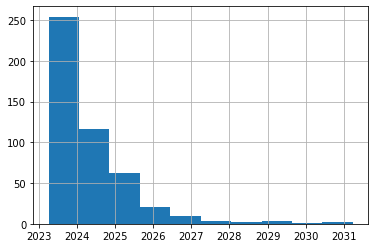

In [24]:
#строим распределение дат готовности данных объектов
df[df.Ready100PercDt>s].Ready100PercDt.hist()

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [25]:
#меняем и сохраняем в другой формат датафрэйм
import pickle
df.to_pickle('C:\\Users\\brigh\\PycharmProjects\\train\\dummy.pkl')

In [26]:
fpath = 'dummy.pkl'
with open(fpath, 'wb') as f:
    pickle.dump(df,f)

with open(fpath, 'rb') as f:
    new_pickle = pickle.load(f)

In [27]:
unpickled_df = pd.read_pickle("./dummy.pkl") 
unpickled_df.head()

,objId,rpdRegionCd,Addr,FloorMin,FloorMax,ElemLivingCnt,Ready100PercDt,SquareLiving,CompensFundFlg,ProblemFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6248.51,0,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,13391,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-06-30,4293.67,1,0,...,Акционерное общество,АО,6.994210e+08,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,23682,47,д Агалатово,10,10,54,2022-06-30,2748.15,1,0,...,Общество с ограниченной ответственностью,ООО,5.562608e+09,7806536079,"Жилой комплекс ""84 высота""",NaN,NaN,NaN,NaN,NaN


In [28]:
# переходим к конвертации в excel, а затем к конвертации обратно в df

In [29]:
df.to_excel('output.xlsx')
from_excel_df = pd.read_excel('output.xlsx')
from_excel_df.iloc[:,1:].tail()

,objId,rpdRegionCd,Addr,FloorMin,FloorMax,ElemLivingCnt,Ready100PercDt,SquareLiving,CompensFundFlg,ProblemFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
995,11023,50,д Покровское,2,3,7,2022-12-31,1526.20,1,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №69",NaN,NaN,NaN,NaN,NaN
996,11026,50,д Покровское,3,3,3,2022-12-31,713.40,1,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №71",NaN,NaN,NaN,NaN,NaN
997,32606,50,д Покровское,3,3,12,2022-12-31,672.84,0,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №57",NaN,NaN,NaN,NaN,NaN
998,32605,50,д Покровское,3,3,12,2022-12-31,672.84,0,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №56",NaN,NaN,NaN,NaN,NaN
999,11021,50,д Покровское,2,2,6,2022-12-31,1011.70,1,0,...,Общество с ограниченной ответственностью,ООО,5.127020e+09,7707796333,"ЖК Футуро Парк (Futuro Park), Корпус №65",NaN,NaN,NaN,NaN,NaN


In [30]:
type(from_excel_df)

pandas.core.frame.DataFrame

In [32]:
import sqlite3

conn = sqlite3.connect('database')

In [33]:
df.to_sql('output_sql', conn, if_exists='replace', index = False)

In [35]:
pd.read_sql('SELECT objId, FloorMax FROM output_sql', conn)

,objId,FloorMax
0,13397,12
1,13399,1
2,13398,10
3,13391,12
4,23682,10
...,...,...
995,11023,3
996,11026,3
997,32606,3
998,32605,3


# Данные по определенному объекту

In [56]:
# потренируемся на объединении датафреймов двух объектов
url_1 = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'
res_1 = requests.get(url_1)
objects_data_1 = res_1.json()

In [57]:
objects_list_1 = objects_data_1.get('data')
df_1 = pd.json_normalize(objects_list_1)
df_1.tail()

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg
0,36774,351714,2,"г Уфа, ул Прибельская, д. 32, 32/1, 34",5,9,0,2024-09-30,Монолит-кирпич,Без отделки,...,0,2,Хабибов Рамиль Хамидуллович,Океан,4,Общество с ограниченной ответственностью,ООО,5767476001,1,0


In [60]:
url_2 = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/13397'
res_2 = requests.get(url_2)
objects_data_2 = res_2.json()

objects_list_2 = objects_data_2.get('data')
df_2 = pd.json_normalize(objects_list_2)
df_2.tail()

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg
0,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,...,699421001,0,0,0,24,35,6,65,4,3


In [75]:
# мержим два df по вертикали
dfdf = pd.concat([df_1, df_2])
dfdf

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg
0,36774,351714,2,"г Уфа, ул Прибельская, д. 32, 32/1, 34",5,9,0,2024-09-30,Монолит-кирпич,Без отделки,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,...,0,0,"2,96",0.0,24.0,35.0,6.0,65.0,4.0,3.0


In [76]:
# объединяем интересующие нас объекты в один df через цикл
for id in df.objId[500:601]:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{id}'
    res = requests.get(url)
    objects_data = res.json()

    objects_list = objects_data.get('data')
    df_obj = pd.json_normalize(objects_list)
    dfdf = pd.concat([dfdf, df_obj], ignore_index=True)


In [77]:
dfdf

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,metro.time,metro.isWalk,metro.colors,greenAreaIndexValue,airQualityIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,complexShortNm
0,36774,351714,2,"г Уфа, ул Прибельская, д. 32, 32/1, 34",5,9,0,2024-09-30,Монолит-кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13983,29236,39,"г Калининград, ул Аллея смелых, д. 269",12,13,147,2022-03-31,Кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13982,29256,39,"г Калининград, ул Аллея смелых, д. 269",12,13,315,2022-09-30,Кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13986,29265,39,"г Калининград, ул Аллея смелых, д. 271",12,13,310,2022-09-30,Кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,29362,94889,78,п Парголово,27,27,318,2022-06-30,Другое,Под ключ,...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
99,41399,402276,78,корпус Корпус 25,27,27,123,2023-12-31,Монолит-кирпич,Без отделки,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
100,41394,402276,78,корпус Корпус 20,27,27,360,2023-12-31,Монолит-кирпич,Под ключ,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
101,41392,402276,78,корпус Корпус 18,27,27,123,2023-12-31,Монолит-кирпич,Без отделки,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#ищем колонку с url картинки
for i in dfdf.columns:
    print(i, end=', ')

id, pdId, region, address, floorMin, floorMax, objElemLivingCnt, objReady100PercDt, wallMaterialShortDesc, objLkFinishTypeDesc, objLkFreePlanDesc, objElemParkingCnt, objSquareLiving, rpdNum, rpdPdfLink, rpdIssueDttm, objLkLatitude, objLkLongitude, objCompensFundFlg, objProblemFlg, objLkClassDesc, loadDttm, photoRenderDTO, objGuarantyEscrowFlg, objectType, miniUrl, residentialBuildings, newBuildingId, objFloorCnt, objFlatCnt, objFlatSq, objNonlivElemCnt, objStatus, isAvailableWantLiveHere, objTransferPlanDt, objInfrstrBicycleLaneFlg, objInfrstrPlaygrndCnt, objInfrstrSportGroundCnt, objInfrstrTrashAreaCnt, objInfrstrObjPrkngCnt, objInfrstrNotObjPrkngCnt, objInfrstrRampFlg, objInfrstrCurbLoweringFlg, objElevatorWheelchairCnt, objElevatorPassengerCnt, objElevatorCargoCnt, soldOutPerc, objPriceAvg, generalContractorNm, nonlivFirstFloor, objectTransportInfo, conclusion, objLkSaleDepEmail, objGreenHouseFlg, objEnergyEffShortDesc, infrastructureIndexValue, developer.devId, developer.devShortCl

In [84]:
dfdf[['photoRenderDTO']].iloc[1].get('photoRenderDTO')

[{'objId': 13397,
  'pdId': 28141,
  'rpdId': 585074,
  'devId': 306,
  'ordNum': 1,
  'objRenderPhotoSize': 1495964,
  'objRenderPhotoUrl': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/3468baf9-f5b6-446b-a6b9-1b3147d72e28',
  'objRenderPhotoDttm': '12-05-2021 16:54',
  'objRenderPhotoHiddenFlg': 0,
  'objRenderPhotoNm': 'IMG_20210512_094406.jpg',
  'objReadyDesc': 'Строится',
  'objBuildTypeShortDesc': 'Жилое',
  'knFlg': 1,
  'loadDttm': '06-05-2022 00:58'},
 {'objId': 13397,
  'pdId': 28141,
  'rpdId': 585074,
  'devId': 306,
  'ordNum': 2,
  'objRenderPhotoSize': 1079175,
  'objRenderPhotoUrl': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/c602e57b-9ff4-4f95-8733-a507e50eaebe',
  'objRenderPhotoDttm': '12-05-2021 16:54',
  'objRenderPhotoHiddenFlg': 0,
  'objRenderPhotoNm': 'IMG_20210512_094452.jpg',
  'objReadyDesc': 'Строится',
  'objBuildTypeShortDesc': 'Жилое',
  'knFlg': 1,
  'loadDttm': '06-05-2022 00:58'},
 {'objId': 13397,
  'pdId': 28141,
  'rpdId': 585074,
  

In [85]:
# пробуем сохранить 1 картинку по url
url_0 = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/3468baf9-f5b6-446b-a6b9-1b3147d72e28'
res_0 = requests.get(url_0)
#objects_data_0= res_1.json()

In [114]:
#res_0.content
from PIL import Image
from io import BytesIO
i = Image.open(BytesIO(res_0.content))

In [115]:
print(i.format, i.size, i.mode)

JPEG (3000, 4000) RGB


In [116]:
i.save('C:\\Users\\brigh\\PycharmProjects\\train\\i.jpg')

In [119]:
# смотрим фото здесь
# Image.open('./i.jpg')